# Plots for Relativity Summary

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.style.use("MATPLOTLIB_RCPARAMS.sty")


from cycler import cycler
default_colors = ['tab:orange', 'tab:blue', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive']
color_cycle = cycler('color', default_colors)

plt.rc('axes', prop_cycle=color_cycle)


# mpl_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
# mpl_colors = [mpl_colors[1]] + [mpl_colors[0]] + mpl_colors[2:]
# mpl_colors

# color_cycle = cycler('color', mpl_colors)

# plt.rc('axes', prop_cycle=color_cycle)

## $\gamma$-factor

In [3]:
def gamma(v):
    return 1 / np.sqrt(1 - v**2)

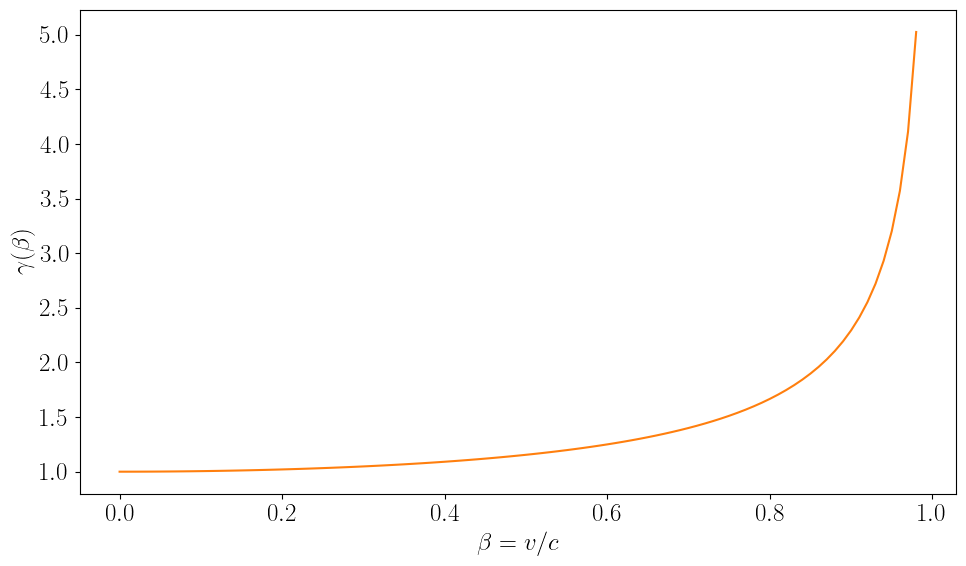

In [ ]:
v_vals = np.arange(0.0, 1 - 1e-2, step=1e-2)
# v_vals = np.arange(0.0, 1 - 1e-6, step=1e-6)
gamma_vals = gamma(v_vals)


plt.figure(figsize=(10, 6))  # Adjust for this plot
plt.plot(v_vals, gamma_vals)

plt.grid(False)
plt.xlabel(r'$\beta = v / c$')
plt.ylabel(r'$\gamma(\beta)$')

plt.tight_layout()
# plt.yscale('log')  # For large range of x_vals

plt.savefig('../pictures/gamma_factor.pdf')

plt.show()

## Clock Diagram

In [3]:
def moving_clocks(v1, v2, tstart, tend, t0, t0prime=None):
    """
    Draw clock diagram for two moving observers which are at rest with
    respect to each other.

    If t1prime is None, we choose it such that clocks are synchronized.
    """
    v_ref = (v1 + v2) / 2  # Still produces best results...

    # v_rel = (v1 + v2) / (1 + v1 * v2)  # v31 uknown here, want v21 (computed above)
    # v_ref = (-v_rel + v2) / (-1 + v_rel * v2)  # Inferred from Dragon Abb. 2.7

    # Idea: v3 = v1 + (v2 - v1) / 2
    # v1 = -v1  # Think might be necessary due to direction, but only for v_avg calculation
    # v_diff = (1 - v1 * v2 - np.sqrt(1 - v1**2 - v2**2 + v1**2 * v2**2)) / (v1 - v2)
    # v_ref = (v1 + v_diff) / (1 + v1 * v_diff)
    # v1 = -v1


    v_12 = (-v1 + v2) / (1 + (-v1) * v2)
    # v_12 = (v1 + v2) / (1 + (v1) * v2)

    # v_ref = v_12 / 2
    
    
    if t0prime is None:
        t0prime = t0  # Looks good overall, but not on right edge
        # t0prime = t0 * np.sqrt(1 - v_12**2)  # Makes behaviour on right good, but overall not

        # t0 = t0 / np.sqrt(1 - v1**2)
        # t0prime = t0 / np.sqrt(1 - v2**2)


    # def ct_axis(t):
    #     return (0, t)

    
    gamma_1 = 1 / np.sqrt(1 - v1**2)
    gamma_2 = 1 / np.sqrt(1 - v2**2)
    gamma_ref = 1 / np.sqrt(1 - v_ref**2)
    gamma_12 = 1 / np.sqrt(1 - v_12**2)

    def ct_1_axis(t):
        return (gamma_1 * (v1 * t), gamma_1 * t)  # NO minus in front of v1 here!

    def ct_2_axis(t):
        return (gamma_2 * (v2 * t), gamma_2 * t)

    def ct_ref_axis(t):
        return (gamma_ref * (v_ref * t), gamma_ref * t)
    
        # Idea: first transform to left axis, then to half of right axis
        # help_result = [gamma_1 * (v1 * t), gamma_1 * t]
        # help_v = (1 - np.sqrt(1 - v_12**2)) / v_12  # Half of v_12
        # help_gamma = 1 / np.sqrt(1 - help_v**2)

        # return (help_gamma * (help_v * help_result[0]), help_gamma * help_result[1])
        
    

    # tau = 0.5 * (-gamma_1 * v1 * t0 + gamma_2 * v2 * t0prime)
    # tauprime = 0.5 * (-gamma_1 * v1 * t0prime + gamma_2 * v2 * t0)

    # tau = (gamma_1 * v1 * t0 - gamma_2 * v2 * t0prime) / (-1 + gamma_2 * v2)
    # tauprime = (-gamma_1 * v1 * t0 + gamma_2 * v2 * t0prime) / (1 + gamma_1 * v1)




    # New try
    # tau = (-gamma_1 * v1 * t0 + gamma_2 * v2 * t0prime) / (1 + gamma_1 * v1)
    # tauprime = (gamma_1 * v1 * t0 - gamma_2 * v2 * t0prime) / (-1 + gamma_2 * v2)

    # t_return = (-gamma_1 * v1 * (t0 + tau) + gamma_2 * v2 * (t0prime + tauprime)) / (1 + gamma_1 * v1)
    # tprime_return = (gamma_1 * v1 * (t0 + tau) - gamma_2 * v2 * (t0prime + tauprime)) / (-1 + gamma_2 * v2)



    # Hmmm, is not 100% correct...

    tau = (gamma_1 * v1 * t0 - gamma_2 * v2 * t0prime) / (-1 + gamma_2 * v2)  # Arrival on right side
    tauprime = (-gamma_1 * v1 * t0 + gamma_2 * v2 * t0prime) / (1 + gamma_1 * v1)  # Arrival on left side

    # tau, tauprime = tauprime, tau  # Only makes things worse

    # t_return = (-gamma_1 * v1 * (t0prime + tauprime) + gamma_2 * v2 * (t0 + tau)) / (1 + gamma_1 * v1)  # Arrival on left side
    # tprime_return = (gamma_1 * v1 * (t0prime + tauprime) - gamma_2 * v2 * (t0 + tau)) / (-1 + gamma_2 * v2)  # Arrival on right side
    
    t_return = (-gamma_1 * v1 * (t0 + tauprime) + gamma_2 * v2 * (t0prime + tau)) / (1 + gamma_1 * v1)  # Arrival on left side
    tprime_return = (gamma_1 * v1 * (t0prime + tau) - gamma_2 * v2 * (t0 + tauprime)) / (-1 + gamma_2 * v2)  # Arrival on right side
    # Probably equivalent because t0=t0prime
    
    # t_return = (-gamma_1 * v1 * (t0 + tau) + gamma_2 * v2 * (t0prime + tauprime)) / (1 + gamma_1 * v1)  # Arrival on left side
    # tprime_return = (gamma_1 * v1 * (t0prime + tauprime) - gamma_2 * v2 * (t0 + tau)) / (-1 + gamma_2 * v2)  # Arrival on right side
    # Does not make sense, but wanted to exclude it as possibility




    # tau = t0
    # tauprime = t0
    # t_return = t0
    # tprime_return = t0



    # print(tau, tau / gamma_12, tauprime, tauprime / gamma_12)
    # print(ct_1_axis(t0), ct_2_axis(t0prime))

    return fr'''
\begin{{tikzpicture}}
    % Draw lines of observers
    \draw[->, thick] {ct_1_axis(tstart / gamma_1)} -- {ct_1_axis(tend / gamma_1)};
    \draw[->, thick] {ct_2_axis(tstart / gamma_2)} -- {ct_2_axis(tend / gamma_2)};
    \draw[->, thick] {ct_ref_axis(tstart / gamma_ref)} -- {ct_ref_axis(tend / gamma_ref)};

    % Draw trajectories of light
    %\draw[->, thick, lightyellow] {ct_1_axis(t0)} -- {ct_2_axis(t0 + tau)};
    %\draw[->, thick, lightyellow] {ct_2_axis(t0prime)} -- {ct_1_axis(t0prime + tauprime)};

    %\draw[->, thick, lightyellow] {ct_2_axis(t0prime + tau)} -- {ct_1_axis(t0 + tauprime + t_return)};
    %\draw[->, thick, lightyellow] {ct_1_axis(t0 + tauprime)} -- {ct_2_axis(t0prime + tau + tprime_return)};

    \draw[->, thick, lightyellow] {ct_1_axis(t0)} -- ++{(tau, tau)} -- ++{(-t_return, t_return)};
    \draw[->, thick, lightyellow] {ct_2_axis(t0prime)} -- ++{(-tauprime, tauprime)} -- ++{(tprime_return, tprime_return)};
\end{{tikzpicture}}
    '''

    # %\draw {ct_1_axis(t0)} node[fill, red, circle, minimum size=3pt] {{t0}};
    # %\draw {ct_2_axis(t0)} node[fill, red, circle, minimum size=3pt] {{t0}};

    # %\draw {ct_1_axis(t0prime)} node[fill, blue, circle, minimum size=3pt] {{t0'}};
    # %\draw {ct_2_axis(t0prime)} node[fill, blue, circle, minimum size=3pt] {{t0'}};

In [4]:
print(moving_clocks(-0.2, 0.4, 0, 6, 1))

print(moving_clocks(-0.2, 0.4, 0, 8, 2))


\begin{tikzpicture}
    % Draw lines of observers
    \draw[->, thick] (-0.0, 0.0) -- (-1.2, 6.0);
    \draw[->, thick] (0.0, 0.0) -- (2.4, 6.0);
    \draw[->, thick] (0.0, 0.0) -- (0.6000000000000001, 6.0);

    % Draw trajectories of light
    %\draw[->, thick, lightyellow] (-0.20412414523193154, 1.0206207261596576) -- (0.9324986273074338, 2.3312465682685843);
    %\draw[->, thick, lightyellow] (0.4364357804719847, 1.0910894511799618) -- (-0.3684132696233799, 1.8420663481168993);

    %\draw[->, thick, lightyellow] (0.9324986273074338, 2.3312465682685843) -- (-0.7020677301679054, 3.5103386508395262);
    %\draw[->, thick, lightyellow] (-0.3684132696233799, 1.8420663481168993) -- (1.8802632975399514, 4.700658243849878);

    \draw[->, thick, lightyellow] (-0.20412414523193154, 1.0206207261596576) -- ++(1.1366227725393654, 1.1366227725393654) -- ++(-1.6345663574753393, 1.6345663574753393);
    \draw[->, thick, lightyellow] (0.4364357804719847, 1.0910894511799618) -- ++(-0.804849050095